# Project 4

## Part 1 - Selection (30 points)


Identify and describe your dataset, its source, and what appeals to you about it.
Acquire the data and perform an initial exploration to determine which themes
you wish to explore. Describe the questions you want to be able to answer with
the data, any concerns you have about the data, and any challenges you expect
to have to overcome.

**Answer:**

Recently, the tax reduction arose lots of attentions; we are pretty interested in the spending as well as revenue of the US government, normally regarded as one of the governments worldwide which financially press their citizens a lot. As a result, we picked up a dataset, provided by San Francisco Controller's Office, reporting the financial status of a typical US citywide government.

Firstly, we get the dataset from 'DataSF', a website freely providing hundreds of datasets from the City and County of San Francisco, and download the csv file by using the codes shown as follow.

Considering the convenience for typing, we renamed the file as 'spending_and_revenue_sf.csv'.

In [1]:
!wget -O spending_and_revenue_sf.csv "https://data.sfgov.org/api/views/bpnb-jwfb/rows.csv?accessType=DOWNLOAD"

--2017-12-08 16:43:11--  https://data.sfgov.org/api/views/bpnb-jwfb/rows.csv?accessType=DOWNLOAD
Resolving data.sfgov.org (data.sfgov.org)... 52.206.140.199
Connecting to data.sfgov.org (data.sfgov.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘spending_and_revenue_sf.csv’

spending_and_revenu     [ <=>                ] 133.42M  5.38MB/s    in 27s     

Last-modified header invalid -- time-stamp ignored.
2017-12-08 16:43:38 (4.91 MB/s) - ‘spending_and_revenue_sf.csv’ saved [139903971]



We can see that the data size is above 100m, and we want to make sure the dataset is neither too large nor too small to explore further by checking the number of the rows.

In [2]:
!wc -l spending_and_revenue_sf.csv

534310 spending_and_revenue_sf.csv


We see that the original dataset contains around 530k rows, which is appropriate for researching in this project. And we expected that there might be some data issues, e.g., null values, to be discussed and dealt with later.

To initially explore the dataset, we decided to firstly take a look at the column names and see what kinds of information the original data can tell.

In [3]:
!csvcut -n spending_and_revenue_sf.csv

  1: Fiscal Year
  2: Revenue or Spending
  3: Related Gov’t Units
  4: Organization Group Code
  5: Organization Group
  6: Department Code
  7: Department
  8: Program Code
  9: Program
 10: Character Code
 11: Character
 12: Object Code
 13: Object
 14: Sub-object Code
 15: Sub-object
 16: Fund Type Code
 17: Fund Type
 18: Fund Code
 19: Fund
 20: Fund Category Code
 21: Fund Category
 22: Amount


Most of the column names clearly indicate the columns' information, while some of them are quite confusing; for instance, so far we have no idea that what the differences are between Fund Type and Fund Category. Accordingly, it is necessary to double check the database website for clarifying the information provided, and the followings are the exact decriptions of each column.

**1. Fiscal Year**

An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.


**2. Revenue or Spending**

Revenue or Spending for this record.


**3. Related Gov’t Units**

In SFOpenBook, these are fiduciary funds and component units that are included in the City’s financial statements but are different in nature from the other funds and organizations in City government. Fiduciary Funds include all Trust and Agency Funds that account for assets held by the City as a trustee or as an agency for individuals or other governmental units.


**4. Organization Group Code**

Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.


**5. Organization Group**

Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.


**6. Department Code**

Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.


**7. Department**

Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.


**8. Program Code**

A program identifies the services a department provides. For example, the Police Department has programs for Patrol, Investigations, and Administration.


**9. Program**

A program identifies the services a department provides. For example, the Police Department has programs for Patrol, Investigations, and Administration.


**10. Character Code**

In the type hierarchy, Character is the highest level. For example, salaries, benefits, contractual services, and materials & supplies are recorded as different Characters.


**11. Character**

In the type hierarchy, Character is the highest level. For example, salaries, benefits, contractual services, and materials & supplies are recorded as different Characters.


**12. Object Code**

In the type hierarchy, Object is the middle level. For example, within the Salaries Character, Objects differentiate between Permanent Salaries, Temporary Salaries, and Overtime pay.


**13. Object**

In the type hierarchy, Object is the middle level. For example, within the Salaries Character, Objects differentiate between Permanent Salaries, Temporary Salaries, and Overtime pay.


**14. Sub-object Code**

In the type hierarchy, Sub-object is the lowest level of detail. For instance, within the Overtime Object, Sub-object segregates overtime for nurses from overtime for police officers and fire fighters (known as uniformed staff).


**15. Sub-object**

In the type hierarchy, Sub-object is the lowest level of detail. For instance, within the Overtime Object, Sub-object segregates overtime for nurses from overtime for police officers and fire fighters (known as uniformed staff).


**16. Fund Type Code**

In the Fund hierarchy, Fund Type is the highest level, and is used to group Funds according to governmental accounting standards.


**17. Fund Type**

In the Fund hierarchy, Fund Type is the highest level, and is used to group Funds according to governmental accounting standards.


**18. Fund Code**

In the Fund hierarchy, Fund is the middle level. For example, within the Special Revenue Fund Type, you can find the Children’s Fund and the Open Space & Park Fund.


**19. Fund**

In the Fund hierarchy, Fund is the middle level. For example, within the Special Revenue Fund Type, you can find the Children’s Fund and the Open Space & Park Fund.


**20. Fund Category Code**

In the Fund hierarchy, Fund Category is the lowest level. Within Fund, Fund Categories group activity by their characteristics: Operating, Annual Projects, Continuing Projects, Grants, Interdepartmental/Work Order.


**21. Fund Category**

In the Fund hierarchy, Fund Category is the lowest level. Within Fund, Fund Categories group activity by their characteristics: Operating, Annual Projects, Continuing Projects, Grants, Interdepartmental/Work Order.


**22. Amount**

The amount earned (Revenue) or spent (Spending) by the City and County of San Francisco.

Briefly, from the dataset we have all the spending and revenue records of the San Francisco during years, and the records provide information on which fund is involved, why it is used/collected, which department manage it, and what the amount is. Recall that our objective is to figure out how many funds are collected for what kinds of purposes and how the funds are actually used by the governments; under the circumstance, the dataset is supposed to be sufficient for achieveing our research goal.

To explore the data itself further, we use csvstat and focus on the first 10,000 rows.

In [4]:
!head -n 10000 spending_and_revenue_sf.csv | csvstat

  1. Fiscal Year
	<class 'int'>
	Nulls: False
	Values: 1999
  2. Revenue or Spending
	<class 'str'>
	Nulls: False
	Values: Spending, Revenue
  3. Related Gov’t Units
	<class 'bool'>
	Nulls: False
	Unique values: 2
	5 most frequent values:
		False:	9915
		True:	84
  4. Organization Group Code
	<class 'int'>
	Nulls: False
	Min: 1
	Max: 7
	Sum: 22857
	Mean: 2.285928592859286
	Median: 2
	Standard Deviation: 1.6235198172370684
	Unique values: 7
	5 most frequent values:
		2:	4211
		1:	3696
		6:	954
		4:	481
		5:	272
  5. Organization Group
	<class 'str'>
	Nulls: False
	Unique values: 7
	5 most frequent values:
		Public Works, Transportation & Commerce:	4211
		Public Protection:	3696
		General Administration & Finance:	954
		Community Health:	481
		Culture & Recreation:	272
	Max length: 40
  6. Department Code
	<class 'str'>
	Nulls: False
	Unique values: 51
	5 most frequent values:
		DPW:	2350
		POL:	789
		AIR:	707
		SHF:	650
		FIR:	550
	Max length: 3
  7. Department
	<class 'str'>
	Nulls: Fa

**Concerns:**

As shown is above, there are null values in several columns, and we will have to deal with those later. Besides, as mentioned before, for each hierarchy, there are more than one columns providing details; thus we should decide properly whether drop some and keep others for convenience, which is the main challenge facing us.

**Potential Questions:**

There are several questions we will answer based on the dataset:
1. What are the total amount of revenue/spending for each year? What is the trend across 10 years for revenue/spending?
2. Is there a surplus or defict for each year?
3. Which organizations manage the largest amounts of funds?
4. what types of fund are involved in transaction the most?


## Part 2 - Wrangling (35 points)


Based on what you found above, wrangle the data into a format suitable for
analysis. This may involve cleaning, filtering, merging, and modeling steps,
any and all of which are valid for this project. Describe your process as you
proceed, and document any scripts, databases, or other models you develop. Be
specific about any key decisions to modify or remove data, how you overcame
any challenges, and all assumptions you make about the meaning of variables
and their values.

Verify that your wrangling steps have succeeded (for example, if you loaded
the data into a dimensional model, ensure that the fact table contains the right
number of records).

**Answer:**

There are two major parts in the wrangling section: cleaning dataset and building database.

**1. Cleaning dataset **

Our initial plan was to use Trifacta to wrangle data. However, since the dataset is over 100 MB, we were not able to import dataset to Trifacta. We then decision to use pandas for several data cleaning steps. 

We first load the dataset.Check the number of rows.

In [5]:
import pandas as pd
df=pd.read_csv("spending_and_revenue_sf.csv",low_memory=False)
len(df.index)

534309

Considering overall goal of our work, we just want to keep some of the columns, and the followings are main reasons for droping each of the others.

**Related Gov't Units:** According to its introduction, we can see that the information provided by this column is unnecessary for our research.

**Department:** 'Organization Group' and 'Department' both indicate the organizational units, while the former is imformative enough to explore futher with the dataset and the abbreviations in 'Department' column are confusing. As a result, we decide to just keep the 'Organization Group' column.

**Object & Sub-object:** 'Character', 'Object' and 'Sub-object' are all in the type hierarchy with different levels; in other words, they all tell the objective of funds used/collected. However, the dimentions in 'Character' columns are enough to let us analyze and there is no need to keep other two. For example, for the 14th record in the original dataset, it was revenue from Expenditure Recovery indicated by 'Character' column, while it is unnecessary and confusing when we take a look at 'Object' and 'Sub-object' columns, which are telling 'Recovery for Svcs to AAO Funds' and 'Exp Rec Fr Juvenile Court (AAO)', respectively.

**Fund Type:** Like type hierarchy, there are also three columns with different level in the fund hierarchy: 'Fund Type', 'Fund' and 'Fund Category'. Unlike the highest level in the type hierarchy, 'Fund Type' here, the highest level in fund hierarchy, is too general to see in the name of which fund on earth is involved in each spending/revenue record. For instance, for 'Special Revenue Funds' in this column, it infers to 'Public Protection Fund', 'Community Health Services Fund', 'Courts' Fund' or others indicated by 'Fund' column, and the latter is obviously more helpful and easier to understand. As supplementary, 'Fund Category' clearly group activity by their characteristics: Operating, Annual Projects, Continuing Projects, etc.

Besides, we drop all of the code columns cause in some cases the codes get pretty weird and we can replace them with numeric IDs for convenience.

As a result, we extract the columns we need to 'df1' dataframe.We also drop all the rows that contain NA values. Since we have a fairly large dataset, and there are only small amount of rows containing NA, dropping these rows won't have significant effect on the analyses.

In [6]:
df1 = df[['Fiscal Year','Revenue or Spending','Organization Group','Program','Character','Fund','Fund Category','Amount']]
df2 = df1.dropna(how='any',axis=0) 
len(df2.index)

530789

To take a look at the total rows for ensuring that the new dataframe contains the right number of records.

Since we only study data that was recorded from 2008 to 2017, we subset all the rows that recorded spending and revenue in these 10 years.

In [7]:
df3=df2.loc[df['Fiscal Year'].isin(['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'])]
len(df3.index)

289429

The final dataset we are going to use to build the database contains approximate 290k rows, which is satisfying for us to do some analyses in this project.

To write the dataframe to csv file for submission purpose.

In [8]:
df3.to_csv('newdataset.csv')

**2.Building database **

To connect to a new database: 'proj4'.

In [9]:
!dropdb -U student proj4

In [10]:
!createdb -U student proj4

In [11]:
%load_ext sql

In [12]:
%sql postgresql://student@/proj4

'Connected: student@proj4'

We design the following schema for the dataset. It contains one fact table and five dimension tables. Here are the demostration of the six tables. 

In [13]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dmfa-2017fall/Star-Schema.png')

We start with populating a temporary fact table.

To create a temporary fact table to load all the data.

In [14]:
%%sql

DROP TABLE IF EXISTS fact;

CREATE TABLE fact (
    fact_id INTEGER,
    fiscal_year INTEGER,
    revenue_spending VARCHAR(10),
    organization_group VARCHAR(50),
    program VARCHAR(50),
    character VARCHAR(50),
    fund VARCHAR(50),
    fund_category VARCHAR(50),
    amount NUMERIC(20,2)    
);

Done.
Done.


[]

To populate the temorary fact table, we use the absolute path here.

In [15]:
!pwd

/home/ubuntu


In [16]:
%%sql
COPY fact FROM '/home/ubuntu/newdataset.csv'
CSV
HEADER;

289429 rows affected.


[]

To verify data was loaded successfully to the temporary fact table.

In [17]:
%%sql
SELECT *
FROM fact
LIMIT 10;

10 rows affected.


fact_id,fiscal_year,revenue_spending,organization_group,program,character,fund,fund_category,amount
205140,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Water Operating Fund,Continuing Projects,171.26
205141,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,General Fund,Annual Projects,-45627.76
205142,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,General Fund,Continuing Projects,-50385.50
205143,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Parking & Traffic Gasoline Tax Fund,Continuing Projects,225822.47
205144,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,"Public Works, Transp. & Commerce Fund",Continuing Projects,1672.97
205145,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,"Public Works, Transp. & Commerce Fund",Work Orders/Overhead,17844.66
205146,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Earthquake Safety Improvements Fund,Continuing Projects,10081.92
205147,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Fire Protection Systems Impvt. Fund,Continuing Projects,583.72
205148,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Recreation & Park Capital Impvts Fund,Continuing Projects,-1628.71
205149,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Recreation & Park Capital Impvts Fund,Grants,55651.28


#### Next, we populate the `RS` table.

To extract RS-related dimension detail.

In [18]:
%%sql
SELECT DISTINCT revenue_spending
FROM fact;

2 rows affected.


revenue_spending
Spending
Revenue


To create `RS` table.

In [19]:
%%sql

DROP TABLE IF EXISTS RS;

CREATE TABLE RS (
    RS_id SERIAL PRIMARY KEY,
    type VARCHAR(10) NOT NULL
);

Done.
Done.


[]

To populate the dimension table with unique values of these dimensions from the dataset.

In [20]:
%%sql
INSERT INTO RS (type)
SELECT DISTINCT revenue_spending
FROM fact;

2 rows affected.


[]

We add a foreign key column to the fact table that references `RS` dimension table.

In [21]:
%%sql
ALTER TABLE fact
ADD COLUMN RS_id INTEGER,
ADD CONSTRAINT fk_RS_id
    FOREIGN KEY (RS_id)
    REFERENCES RS (RS_id);

Done.


[]

To create an index on all columns in `RS` table.

In [22]:
%%sql
DROP INDEX IF EXISTS idx_RS;

CREATE INDEX idx_RS ON RS (type);

Done.
Done.


[]

In [23]:
%%sql
UPDATE fact
SET RS_id = RS.RS_id
FROM RS
WHERE fact.revenue_spending = RS.type;

289429 rows affected.


[]

To see if we successfully populate the foreign key column in the fact table.

In [24]:
%%sql
SELECT *
FROM fact
LIMIT 10;

10 rows affected.


fact_id,fiscal_year,revenue_spending,organization_group,program,character,fund,fund_category,amount,rs_id
217214,2008,Spending,Public Protection,Patrol,Non Personnel Services,Gift Fund,Grants,882.50,1
229911,2008,Revenue,Public Protection,Fire Nert,Other Revenues,Gift Fund,Grants,9975.00,2
232203,2008,Revenue,Culture & Recreation,Branch Program,Other Revenues,Gift Fund,Grants,4170.00,2
263962,2009,Spending,Public Protection,Security Services,Salaries,General Fund,Operating,366.85,1
285803,2010,Revenue,Public Protection,Grant Services,Other Revenues,Gift Fund,Grants,3666.00,2
290596,2010,Spending,Public Protection,Emergency Services,Salaries,General Fund,Operating,-1365.00,1
291312,2010,Spending,Public Protection,Log Cabin Ranch,Salaries,General Fund,Operating,1140649.97,1
308471,2010,Spending,Culture & Recreation,Golden Gate Park,Salaries,Bequests Fund,Grants,12626.00,1
335828,2011,Spending,Culture & Recreation,Public Art,Salaries,Gift Fund,Grants,830.99,1
342642,2012,Revenue,Public Protection,Fire General,Other Revenues,Gift Fund,Grants,5380.53,2


End of populating `RS` table.

#### Next, we populate the `fund` table.

To extract fund-related dimension details.

In [25]:
%%sql
SELECT DISTINCT Fund, Fund_Category
FROM fact
LIMIT 10;

10 rows affected.


fund,fund_category
Other Agency Fund,Operating
Courts' Fund,Annual Projects
Police Dept. Facilities Impvt. Fund,Grants
Real Property Fund,Continuing Projects
School District Agency Fund,Operating
Parking Off Street Parking Oper Fund,Operating
SFCTA Capital Project Fund,Continuing Projects
San Francisco Finance Corporation,Continuing Projects
Transportation & Commerce Fund,Grants
Port Capital Projects Fund,Continuing Projects


To create `fund` table.

In [26]:
%%sql

DROP TABLE IF EXISTS fund;

CREATE TABLE fund (
    fund_id SERIAL PRIMARY KEY,
    fund VARCHAR(50) NOT NULL,
    fund_category VARCHAR(50) NOT NULL
);

Done.
Done.


[]

To populate the dimension table with unique values of these dimensions from the dataset.

In [27]:
%%sql
INSERT INTO fund (fund,fund_category)
SELECT DISTINCT Fund, Fund_Category
FROM fact;

246 rows affected.


[]

We add a foreign key column to the fact table that references `fund` dimension table.

In [28]:
%%sql
ALTER TABLE fact
ADD COLUMN fund_id INTEGER,
ADD CONSTRAINT fk_fund_id
    FOREIGN KEY (fund_id)
    REFERENCES fund (fund_id);

Done.


[]

In [29]:
%%sql
SELECT fund_id FROM fact
LIMIT 10;

10 rows affected.


fund_id
None
None
None
None
None
None
None
None
None
None


To create an index on all columns in `fund` table.

In [30]:
%%sql
DROP INDEX IF EXISTS idx_fund;

CREATE INDEX idx_fund ON fund (fund,fund_category);

Done.
Done.


[]

In [31]:
%%sql
UPDATE fact
SET fund_id = fund.fund_id
FROM fund
WHERE fact.Fund = fund.fund
    AND fact.Fund_Category = fund.fund_category;

289429 rows affected.


[]

To see if we successfully populate the foreign key column in `fact` table.

In [32]:
%%sql
SELECT *
FROM fact
LIMIT 10;

10 rows affected.


fact_id,fiscal_year,revenue_spending,organization_group,program,character,fund,fund_category,amount,rs_id,fund_id
407341,2014,Spending,Public Protection,Sheriff Programs,Salaries,General Fund,Operating,625.00,1,161
423881,2014,Spending,Culture & Recreation,Golden Gate Park,Salaries,Bequests Fund,Grants,2469.74,1,154
424113,2014,Spending,Culture & Recreation,Parks,Non Personnel Services,Golf Fund,Operating,2360.00,1,86
424999,2014,Spending,Culture & Recreation,Rec & Park Administration,Materials & Supplies,Gift Fund,Grants,209.98,1,230
425105,2014,Spending,Culture & Recreation,Academy Of Sciences,Salaries,General Fund,Operating,806707.73,1,161
426881,2014,Spending,General Administration & Finance,Legal Service,Salaries,General Fund,Operating,1693730.87,1,161
427442,2014,Spending,General Administration & Finance,Current Planning,Salaries,General Fund,Operating,4093224.97,1,161
433234,2015,Spending,Public Protection,Log Cabin Ranch,Salaries,General Fund,Operating,54009.88,1,161
467196,2016,Spending,Public Protection,Security Services,Salaries,General Fund,Operating,3699.80,1,161
468130,2017,Spending,Public Protection,Patrol,Non Personnel Services,Gift Fund,Grants,150.00,1,230


#### End of populating `fund` table.

#### Next, we populate `character` table.

To extract character-related dimension details.

In [33]:
%%sql
SELECT DISTINCT character
FROM fact
LIMIT 10;

10 rows affected.


character
Licenses; Permits & Franchises
Expenditure Recovery
Other Local Taxes
Other Support&Care Of Persons
Transfer Adjustments-Sources
Business Taxes
Intrafund Transfers Out
Other Expenses-Non Expend Type
Aid Assistance
Other Financing Sources


To create `character` table.

In [34]:
%%sql

DROP TABLE IF EXISTS character;

CREATE TABLE character (
    character_id SERIAL PRIMARY KEY,
    character VARCHAR(50) NOT NULL
);

Done.
Done.


[]

To populate the dimension table with unique values of dimension from the dataset.

In [35]:
%%sql
INSERT INTO character (character)
SELECT DISTINCT character
FROM fact;

46 rows affected.


[]

We add a foreign key column to the fact table that references character dimension table.

In [36]:
%%sql
ALTER TABLE fact
ADD COLUMN character_id INTEGER,
ADD CONSTRAINT fk_character_id
    FOREIGN KEY (character_id)
    REFERENCES character (character_id);

Done.


[]

To create an index on all columns in `character` table.

In [37]:
%%sql
DROP INDEX IF EXISTS idx_character;

CREATE INDEX idx_character ON character (character);

Done.
Done.


[]

In [38]:
%%sql
UPDATE fact
SET character_id = character.character_id
FROM character
WHERE fact.character = character.character;

289429 rows affected.


[]

To see if we successfully populate the foreign key column in fact table.

In [39]:
%%sql
SELECT *
FROM fact
LIMIT 10;

10 rows affected.


fact_id,fiscal_year,revenue_spending,organization_group,program,character,fund,fund_category,amount,rs_id,fund_id,character_id
468130,2017,Spending,Public Protection,Patrol,Non Personnel Services,Gift Fund,Grants,150.00,1,230,42
481547,2016,Spending,Community Health,Sfhn-Managed Care,Salaries,General Fund,Operating,6714.40,1,161,14
235567,2008,Spending,Public Protection,Grant Services,Salaries,Gift Fund,Grants,2466.08,1,230,14
235568,2008,Spending,Public Protection,Grant Services,Salaries,Public Protection Fund,Grants,4099.39,1,105,14
515919,2017,Spending,Culture & Recreation,Law Library,Salaries,General Fund,Operating,246239.09,1,161,14
235569,2008,Spending,Public Protection,Grant Services,Salaries,Gift Fund,Grants,2385.02,1,230,14
235570,2008,Spending,Public Protection,Grant Services,Salaries,Public Protection Fund,Grants,3209.80,1,105,14
235571,2008,Spending,Public Protection,Grant Services,Salaries,Gift Fund,Grants,3340.50,1,230,14
235572,2008,Spending,Public Protection,Grant Services,Salaries,Public Protection Fund,Grants,625.00,1,105,14
229662,2008,Spending,Community Health,Health At Home,Salaries,General Fund,Operating,277858.70,1,161,14


#### End of populating `character` table.

#### Next, we populate `organization` table.

To extract organization-related dimension details.

In [40]:
%%sql
SELECT DISTINCT organization_group
FROM fact;

7 rows affected.


organization_group
Human Welfare & Neighborhood Development
Community Health
General City Responsibilities
Public Protection
Culture & Recreation
"Public Works, Transportation & Commerce"
General Administration & Finance


To create `organization` table. 

In [41]:
%%sql

DROP TABLE IF EXISTS organization;

CREATE TABLE organization (
    organization_id SERIAL PRIMARY KEY,
    organization VARCHAR(50) NOT NULL
);

Done.
Done.


[]

To populate the dimension table with unique values of dimension from the dataset.

In [42]:
%%sql
INSERT INTO organization (organization)
SELECT DISTINCT organization_group
FROM fact;

7 rows affected.


[]

We add a foreign key column to the fact table that references organization dimension table.

In [43]:
%%sql
ALTER TABLE fact
ADD COLUMN organization_id INTEGER,
ADD CONSTRAINT fk_organization_id
    FOREIGN KEY (organization_id)
    REFERENCES organization (organization_id);

Done.


[]

To create an index on all columns in `organization` table.

In [44]:
%%sql
DROP INDEX IF EXISTS idx_organization;

CREATE INDEX idx_organization ON organization (organization);

Done.
Done.


[]

In [45]:
%%sql
UPDATE fact
SET organization_id = organization.organization_id
FROM organization
WHERE fact.organization_group = organization.organization;

289429 rows affected.


[]

To see if we successfully populate the foreign key column in fact table.

In [46]:
%%sql
SELECT *
FROM fact
LIMIT 10;

10 rows affected.


fact_id,fiscal_year,revenue_spending,organization_group,program,character,fund,fund_category,amount,rs_id,fund_id,character_id,organization_id
229662,2008,Spending,Community Health,Health At Home,Salaries,General Fund,Operating,277858.70,1,161,14,2
229947,2008,Spending,Community Health,Health At Home,Salaries,General Fund,Operating,346845.67,1,161,14,2
235745,2008,Spending,Public Protection,Investigations,Materials & Supplies,General Fund,Operating,2202.00,1,161,44,4
236070,2008,Spending,Public Protection,Patrol,Mandatory Fringe Benefits,General Fund,Operating,324.00,1,161,22,4
236071,2008,Spending,Public Protection,Patrol,Mandatory Fringe Benefits,General Fund,Operating,15701.53,1,161,22,4
263649,2009,Spending,Public Protection,Patrol,Non Personnel Services,General Fund,Operating,339501.39,1,161,42,4
263650,2009,Spending,Public Protection,Patrol,Non Personnel Services,General Fund,Operating,688103.90,1,161,42,4
263651,2009,Spending,Public Protection,Patrol,City Grant Programs,Public Protection Fund,Grants,40000.00,1,105,26,4
263652,2009,Spending,Public Protection,Patrol,Materials & Supplies,General Fund,Operating,12173.44,1,161,44,4
263653,2009,Spending,Public Protection,Patrol,Materials & Supplies,General Fund,Operating,3345.05,1,161,44,4


#### End of populating `organization` table.

#### Next, we populate `program` table.

To extract program-related dimension details.

In [47]:
%%sql
SELECT DISTINCT program
FROM fact
LIMIT 10;

10 rows affected.


program
Health At Home
Fire Nert
Non-Grant Construction Projects
Fire Prevention
Refugee Resettlement Program
Laguna Honda Hosp - Acute Care
Medi-Cal
Muni-General Management
Departmental Administration
Information Technology


To create `program` table.

In [48]:
%%sql

DROP TABLE IF EXISTS program;

CREATE TABLE program (
    program_id SERIAL PRIMARY KEY,
    program VARCHAR(50)
);

Done.
Done.


[]

To populate the dimension table with unique values of dimension from the dataset.

In [49]:
%%sql
INSERT INTO program (program)
SELECT DISTINCT program 
FROM fact;

443 rows affected.


[]

We add a foreign key column to the fact table that references program dimension table.

In [50]:
%%sql
ALTER TABLE fact
ADD COLUMN program_id INTEGER,
ADD CONSTRAINT fk_program_id
    FOREIGN KEY (program_id)
    REFERENCES program (program_id);

Done.


[]

To create an index on all columns in `program` table.

In [51]:
%%sql
DROP INDEX IF EXISTS idx_program;

CREATE INDEX idx_program ON program (program);

Done.
Done.


[]

In [52]:
%%sql
UPDATE fact
SET program_id = program.program_id
FROM program
WHERE fact.program = program.program;

289429 rows affected.


[]

To see if we successfully populate the foreign key column in fact table.

In [53]:
%%sql
SELECT *
FROM fact
LIMIT 10;

10 rows affected.


fact_id,fiscal_year,revenue_spending,organization_group,program,character,fund,fund_category,amount,rs_id,fund_id,character_id,organization_id,program_id
263653,2009,Spending,Public Protection,Patrol,Materials & Supplies,General Fund,Operating,3345.05,1,161,44,4,319
263654,2009,Spending,Public Protection,Patrol,Materials & Supplies,General Fund,Operating,62.28,1,161,44,4,319
263655,2009,Spending,Public Protection,Patrol,Materials & Supplies,General Fund,Operating,138.52,1,161,44,4,319
263656,2009,Spending,Public Protection,Patrol,Materials & Supplies,General Fund,Operating,40622.33,1,161,44,4,319
263657,2009,Spending,Public Protection,Patrol,Materials & Supplies,General Fund,Operating,161.11,1,161,44,4,319
205140,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Water Operating Fund,Continuing Projects,171.26,1,14,22,6,91
205141,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,General Fund,Annual Projects,-45627.76,1,175,22,6,91
205142,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,General Fund,Continuing Projects,-50385.50,1,223,22,6,91
205147,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Fire Protection Systems Impvt. Fund,Continuing Projects,583.72,1,132,22,6,91
230025,2008,Revenue,Public Protection,Patrol,Other Revenues,Gift Fund,Grants,5845.00,2,230,37,4,319


#### End of populating `program` table.

We can now remove all columns in fact table that are not facts nor foreign keys of dimension tables.

In [54]:
%%sql
ALTER TABLE fact
DROP COLUMN fact_id,
DROP COLUMN revenue_spending,
DROP COLUMN organization_group,
DROP COLUMN program,
DROP COLUMN character,
DROP COLUMN fund,
DROP COLUMN fund_category;

Done.


[]

In [55]:
%%sql
SELECT *
FROM fact
LIMIT 10;

10 rows affected.


fiscal_year,amount,rs_id,fund_id,character_id,organization_id,program_id
2008,5845.00,2,230,37,4,319
2008,864203.78,1,161,14,2,271
2009,34257.11,1,161,44,4,69
2008,3850.00,1,193,44,5,32
2008,8817.17,1,161,44,5,137
2008,905.92,1,161,42,7,69
2009,114539.16,1,105,14,4,319
2009,33690.67,1,53,14,4,319
2009,14807598.40,1,161,14,4,319
2009,201492.70,2,161,2,4,230


To check the number of row matches that of the wrangled dataframe. 

In [56]:
%%sql
SELECT COUNT(*) 
FROM fact;

1 rows affected.


count
289429


Thus we are sure that we have the correct fact table.

## Part 3 - Analysis (35 points)

Explore and analyze your data in its wrangled form. Follow through on the
themes you identified in Part 1 with queries or scripts that answer the questions
you had in mind. Be clear about the answers you discover, discussing them and
whether the results match your expectations. Include charts or other visuals
that support your analysis. You may use Tableau, ggplot, or other tools we
have not covered in class for visualization, but be sure to export images and to
include them properly in your writeup.


**Answer:**

We firstly import some necessary Python modules.

In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

To see the total amount of revenue each year.

In [58]:
%%sql
SELECT fact.fiscal_year, sum(fact.amount) as revenue_amount
FROM fact
JOIN RS
ON fact.rs_id=RS.rs_id
WHERE RS.type='Revenue'
GROUP BY fact.fiscal_year
ORDER BY fact.fiscal_year;

10 rows affected.


fiscal_year,revenue_amount
2008,8332812399.38
2009,9113646360.95
2010,11041315212.53
2011,10559553014.76
2012,11955234445.83
2013,12272215852.43
2014,12103140489.91
2015,12926845611.19
2016,13790489689.38
2017,13929932358.14


In [59]:
df=_.DataFrame()

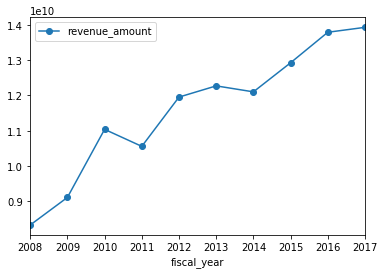

In [60]:
df=df.astype(float)
df.plot(x='fiscal_year', y='revenue_amount', style='o',linestyle='-')

We can clearly see that the revenue underwent an steady increase in last ten years, despite several drops. And the revenue in 2017 (FY2016-2017) is twice as much as that in 2008 (FY2007-2008).

Similarly, we want to see the trend of the annual amounts of spending during last ten years.

In [61]:
%%sql
SELECT fact.fiscal_year, sum(fact.amount) as spend_amount
FROM fact
JOIN RS
ON fact.rs_id=RS.rs_id
WHERE RS.type='Spending'
GROUP BY fact.fiscal_year
ORDER BY fact.fiscal_year;

10 rows affected.


fiscal_year,spend_amount
2008,8320554906.14
2009,8616502486.82
2010,9185963929.98
2011,9738243905.15
2012,10465877639.99
2013,11015995873.07
2014,11712598141.50
2015,11610478035.03
2016,12622077979.58
2017,12617090257.71


In [62]:
df=_.DataFrame()

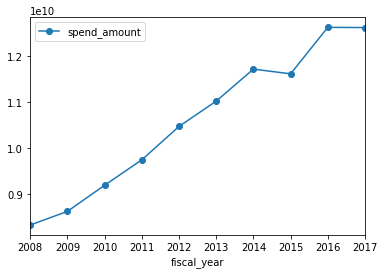

In [63]:
df=df.astype(float)
df.plot(x='fiscal_year', y='spend_amount', style='o',linestyle='-')

Clearly, amounts of spending these years share similar upward trend with that of revenue. It is reasonable that with more revenue, the government then has a looser budget. Also, the amount of spending increases fairly constantly each year. 

Now, it is time to check the financial status, i.e., surplus or deficit, of the government each year.

In [64]:
%%sql
SELECT Revenue.fiscal_year, (Revenue.revenue_amount - Spending.spend_amount) as net_revenue
FROM (SELECT fact.fiscal_year as fiscal_year, sum(fact.amount) as revenue_amount
      FROM fact
      JOIN RS
      ON fact.rs_id=RS.rs_id
      WHERE RS.type='Revenue'
      GROUP BY fact.fiscal_year
      ORDER BY fact.fiscal_year) as Revenue
JOIN (SELECT fact.fiscal_year as fiscal_year, sum(fact.amount) as spend_amount
      FROM fact
      JOIN RS
      ON fact.rs_id=RS.rs_id
      WHERE RS.type='Spending'
      GROUP BY fact.fiscal_year
      ORDER BY fact.fiscal_year) as Spending
ON Revenue.fiscal_year=Spending.fiscal_year;

10 rows affected.


fiscal_year,net_revenue
2008,12257493.24
2009,497143874.13
2010,1855351282.55
2011,821309109.61
2012,1489356805.84
2013,1256219979.36
2014,390542348.41
2015,1316367576.16
2016,1168411709.80
2017,1312842100.43


In [65]:
df=_.DataFrame()

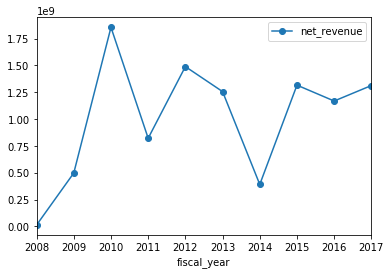

In [66]:
df=df.astype(float)
df.plot(x='fiscal_year', y='net_revenue', style='o',linestyle='-')

From the query result and the plot, we see that in the past ten years, the annual net revenues of the government are all greater than zero, which means there does exist surplus each year in San Francisco governmental financial system.

**Next, we want to figure out which organizations manage the largest amounts of funds. Here we focus on the data in the last three years.**

In [67]:
%%sql
WITH orgrev_2015 AS (
SELECT fact.fiscal_year,organization.organization,sum(fact.amount) as revenue_total
FROM fact 
JOIN organization ON organization.organization_id=fact.organization_id
JOIN RS ON fact.rs_id=RS.rs_id
WHERE RS.type='Revenue' and fact.fiscal_year='2015'
GROUP BY fact.fiscal_year,organization.organization
ORDER BY revenue_total DESC),
orgrev_2016 AS (
SELECT fact.fiscal_year,organization.organization,sum(fact.amount) as revenue_total
FROM fact 
JOIN organization ON organization.organization_id=fact.organization_id
JOIN RS ON fact.rs_id=RS.rs_id
WHERE RS.type='Revenue' and fact.fiscal_year='2016'
GROUP BY fact.fiscal_year,organization.organization
ORDER BY revenue_total DESC),
orgrev_2017 AS (
SELECT fact.fiscal_year,organization.organization,sum(fact.amount) as revenue_total
FROM fact 
JOIN organization ON organization.organization_id=fact.organization_id
JOIN RS ON fact.rs_id=RS.rs_id
WHERE RS.type='Revenue' and fact.fiscal_year='2017'
GROUP BY fact.fiscal_year,organization.organization
ORDER BY revenue_total DESC
), total_orgrev AS(
SELECT*FROM orgrev_2015
UNION
SELECT*FROM orgrev_2016
UNION
SELECT*FROM orgrev_2017)
SELECT*FROM total_orgrev
ORDER BY fiscal_year;

21 rows affected.


fiscal_year,organization,revenue_total
2015,Culture & Recreation,344343515.77
2015,Human Welfare & Neighborhood Development,1406510829.14
2015,"Public Works, Transportation & Commerce",3868374791.90
2015,Community Health,1596564113.56
2015,General Administration & Finance,2788413937.99
2015,Public Protection,297863581.19
2015,General City Responsibilities,2624774841.64
2016,General City Responsibilities,2680604132.05
2016,Public Protection,326281272.97
2016,Human Welfare & Neighborhood Development,1619388921.67


We try to demonstrate the results vividly in Tableau, as shown below.

In [68]:
Image(url='https://s3.amazonaws.com/dmfa-2017fall/Pro4--rev.jpeg')

Clearly, 'Public Works, Transportation & Commerce' Group has the largest revenue across these years, followed by 'General City Responsibilities' and 'General Administration & Finance'. The result makes sense to us since transportation and commerce usually generate many income for the government, so do the other two organizations. Besides, it is reasonable that the revenue from Public Works, Transportation & Commerce decreased after 2016 taking into consideration that 'Uber', 'lyft' and others became popular these year.

In [69]:
%%sql
WITH orgspend_2015 AS (
SELECT fact.fiscal_year,organization.organization,sum(fact.amount) as spend_total
FROM fact 
JOIN organization ON organization.organization_id=fact.organization_id
JOIN RS ON fact.rs_id=RS.rs_id
WHERE RS.type='Spending' and fact.fiscal_year='2015'
GROUP BY fact.fiscal_year,organization.organization
ORDER BY spend_total DESC),
orgspend_2016 AS (
SELECT fact.fiscal_year,organization.organization,sum(fact.amount) as spend_total
FROM fact 
JOIN organization ON organization.organization_id=fact.organization_id
JOIN RS ON fact.rs_id=RS.rs_id
WHERE RS.type='Spending' and fact.fiscal_year='2016'
GROUP BY fact.fiscal_year,organization.organization
ORDER BY spend_total DESC),
orgspend_2017 AS (
SELECT fact.fiscal_year,organization.organization,sum(fact.amount) as spend_total
FROM fact 
JOIN organization ON organization.organization_id=fact.organization_id
JOIN RS ON fact.rs_id=RS.rs_id
WHERE RS.type='Spending' and fact.fiscal_year='2017'
GROUP BY fact.fiscal_year,organization.organization
ORDER BY spend_total DESC
), total_orgspend AS(
SELECT*FROM orgspend_2015
UNION
SELECT*FROM orgspend_2016
UNION
SELECT*FROM orgspend_2017)
SELECT*FROM total_orgspend
ORDER BY fiscal_year;

21 rows affected.


fiscal_year,organization,spend_total
2015,General Administration & Finance,2394365501.18
2015,Community Health,1794130104.53
2015,Human Welfare & Neighborhood Development,1202185527.41
2015,General City Responsibilities,391283695.69
2015,Public Protection,1333975773.08
2015,Culture & Recreation,313605424.35
2015,"Public Works, Transportation & Commerce",4180932008.79
2016,Public Protection,1398936149.05
2016,Human Welfare & Neighborhood Development,1317163525.61
2016,Culture & Recreation,466050522.30


In [70]:
Image(url='https://s3.amazonaws.com/dmfa-2017fall/Pro4--sp.jpeg')

For governmental spending, we see that 'Public Works, Transportation & Commerce' group obviously takes up the most in the three years, followed by 'General Administration & Finance' and 'Community Health'. Compare to the revenue graph, we see that even though 'Public Works, Transportation & Commerce' generates the most revenue for the government, it is also the department that takes up the most spending. On the contrast, 'General City Responsibilities' generates the second most revenue for the government, but it is one of the lowest spending organizations among all these organizations. We also found that 'Culture & Recreation' generates the least revenue and also takes up least spending among all organizations.

**Next, it is also one of our aims to get some ideas which funds are involved most.**

In [71]:
%%sql
SELECT DISTINCT fund.fund_category, sum(fact.amount) as revenue_amount
FROM fact,fund,RS
WHERE fact.fund_id = fund.fund_id and fact.RS_id=RS.RS_id and RS.type='Revenue'
GROUP BY fund.fund_category
ORDER BY revenue_amount DESC;

5 rows affected.


fund_category,revenue_amount
Operating,87976140752.29
Continuing Projects,18444365560.97
Grants,5470413115.17
Annual Projects,3937054372.14
Work Orders/Overhead,197211633.93


In [72]:
%%sql
SELECT DISTINCT fund.fund_category, sum(fact.amount) as spend_amount
FROM fact,fund,RS
WHERE fact.fund_id = fund.fund_id and fact.RS_id=RS.RS_id and RS.type='Spending'
GROUP BY fund.fund_category
ORDER BY spend_amount DESC;

5 rows affected.


fund_category,spend_amount
Operating,80670230679.69
Continuing Projects,15991726084.62
Grants,5464091733.00
Annual Projects,3582620814.46
Work Orders/Overhead,196713843.20


Here we still use Tableau to achieve visualization, and this time we create trends in the past ten years.

In [73]:
Image(url='https://s3.amazonaws.com/dmfa-2017fall/Project+4_trends.jpg')

From the bar charts above, 'Operating' fund is involved most of the times during past ten years and rises along with the total funds' increases. It is reasonable since huge amount of fund is needed to keep the hold government running. The next largest fund is located to 'Continuing Projects'. The government usually launches huge project that continue for several years and takes up huge amount of money. It makes sense that this type of fund cost the government a lot of money. At the same time, many of such project also generate a mass of return for the goverment. From this graph, we barely see 'Work Orders/Overhead' fund get involved. Since we are not familiar with this fund type, our guess is that it is not a major fund for the government. 

**Finally, we want to know the source and usage of the funds.**

In [74]:
%%sql
SELECT DISTINCT program.program, sum(fact.amount) as revenue_amount
FROM fact,program,RS
WHERE fact.program_id = program.program_id and fact.RS_id=RS.RS_id and RS.type='Revenue'
GROUP BY program.program
ORDER BY revenue_amount DESC
limit 10;

10 rows affected.


program,revenue_amount
General Fund Unallocated,27134439883.05
No Program Defined,17187977134.48
Administration,16515350758.04
"Revenue, Transfers & Reserves",7697988486.55
SFGH - Acute Care - Hospital,7304818043.88
"Administration, Business",4365958181.91
Community Health/Support Service,4291756893.49
Administrative Support,3813664939.26
Health Service System,2911649762.99
Capital Programs & Construction,2608338169.04


In [75]:
Image(url='https://s3.amazonaws.com/dmfa-2017fall/Pro4--revbypro.jpeg')

In [76]:
%%sql
SELECT distinct program.program, sum(fact.amount) as spend_amount
FROM fact,program,RS
WHERE fact.program_id = program.program_id and fact.RS_id=RS.RS_id and RS.type='Spending'
GROUP BY program.program
ORDER BY spend_amount DESC
limit 10;

10 rows affected.


program,spend_amount
Administration,11867953878.03
SFGH - Acute Care - Hospital,6442300076.07
Rail & Bus Services,4895100802.07
Community Health/Support Service,4290946903.43
Water Capital Projects,4204991019.87
Business & Finance,4063922421.37
General City Responsibilities,3208804722.58
Health Service System,2871055497.96
Patrol,2812324407.38
Fire Suppression,2511187318.54


In [77]:
Image(url='https://s3.amazonaws.com/dmfa-2017fall/Pro4--spbypro.jpeg')

From the results, we see that most of the revenue were from 'General Fund Unallocated', i.e. retained money, which means instead of using the funds for some programs, the government chose to keep them, indicating that the efficiency of fund using was a bit low - these retained money could be used for making better life of citizens. For the spending, it is not surprising that 'Administration' took up the most amount, taking into account in 'Spending Trends in Fund Categories' we saw that the operating costs was the largest expenses across years. Besides, we are pleased to see 'Acute Care', 'Rail & Bus Services', and 'Community Health/Support Service' programs were also the focuses of the government, which means the tax we paid was worthy.

## Bonus - Augment (10 points)

Sometimes the most value can be gained from one dataset when it is studied
alongside data drawn from other sources. Identify at least one additional data
source that can complement your analysis. Pull this additional data into your
chosen environment and explore at least one more theme you are able to further
analyze that depends upon a combination of data from both sources.

**Answer:**

San Francisco is the most innovative place in the world. The city government plays a critical role in distributing budget into different areas and collecting taxes. Our analysis aim to reflect the trend of economic performances in the last ten years by comparing the tax revenue with key economic indexes of the city. 

In [78]:
import pandas as pd
newdata = pd.read_csv('newdataset.csv')

For convenience, we upload these two csv files to s3 in advance.

In [79]:
!wget https://s3.amazonaws.com/dmfa-2017fall/SFecon-Annual.csv
!wget https://s3.amazonaws.com/dmfa-2017fall/SFecon-Monthly.csv

--2017-12-08 16:44:18--  https://s3.amazonaws.com/dmfa-2017fall/SFecon-Annual.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.230.133
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.230.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234 [text/csv]
Saving to: ‘SFecon-Annual.csv.5’

SFecon-Annual.csv.5 100%[===================>]     234  --.-KB/s    in 0s      

2017-12-08 16:44:18 (12.0 MB/s) - ‘SFecon-Annual.csv.5’ saved [234/234]

--2017-12-08 16:44:18--  https://s3.amazonaws.com/dmfa-2017fall/SFecon-Monthly.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.230.133
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.230.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4753 (4.6K) [text/csv]
Saving to: ‘SFecon-Monthly.csv.4’

SFecon-Monthly.csv. 100%[===================>]   4.64K  --.-KB/s    in 0s      

2017-12-08 16:44:18 (338 MB/s) - ‘SFecon-Monthly.csv.4’ saved [4753/4753]



In [80]:
gdp = pd.read_csv('SFecon-Annual.csv')
other = pd.read_csv('SFecon-Monthly.csv')

We first take a look of the columns in two csv files.

In [81]:
!csvcut -n SFecon-Annual.csv

  1: ﻿DATE
  2: GDP
  3: Year


In [82]:
!csvcut -n SFecon-Monthly.csv

  1: ﻿DATE
  2: Unemployment_rate
  3: CPI
  4: ECON_CONDITION_INDEX
  5: HPI
  6: Year


In [83]:
!csvcut -n newdataset.csv

  1: 
  2: Fiscal Year
  3: Revenue or Spending
  4: Organization Group
  5: Program
  6: Character
  7: Fund
  8: Fund Category
  9: Amount


We then create three new tables: newdata, gdp and other.

In [84]:
%%sql
DROP TABLE IF EXISTS newdata;

CREATE TABLE newdata 
(
    ID    TEXT,
    Year     TEXT,
    Revenue_spending TEXT,
    Org   TEXT,
    Prog     TEXT,
    Chara TEXT,
    Fund   TEXT,
    Fund_cat  TEXT,
    Amount   NUMERIC
);

Done.
Done.


[]

To populate the tables, we again use absolute path.

In [85]:
%%sql
COPY newdata FROM '/home/ubuntu/newdataset.csv'
CSV
HEADER;

289429 rows affected.


[]

In [86]:
%%sql
DROP TABLE IF EXISTS gdp;

CREATE TABLE gdp 
(
    DATE    TEXT,
    Amount   NUMERIC,
    Year     TEXT
);

Done.
Done.


[]

In [87]:
%%sql
COPY gdp FROM '/home/ubuntu/SFecon-Annual.csv'
CSV
HEADER;

9 rows affected.


[]

In [88]:
%%sql
DROP TABLE IF EXISTS other;

CREATE TABLE other
(
    DATE    TEXT,
    Unemployment_rate   NUMERIC,
    CPI   NUMERIC,
    ECON_CONDITION_INDEX    NUMERIC,
    HPI NUMERIC,
    Year     TEXT
);

Done.
Done.


[]

In [89]:
%%sql
COPY other FROM '/home/ubuntu/SFecon-Monthly.csv'
CSV
HEADER;

114 rows affected.


[]

Check the three tables.

In [90]:
%%sql
SELECT *
FROM newdata
LIMIT 10

10 rows affected.


id,year,revenue_spending,org,prog,chara,fund,fund_cat,amount
205140,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Water Operating Fund,Continuing Projects,171.26
205141,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,General Fund,Annual Projects,-45627.76
205142,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,General Fund,Continuing Projects,-50385.5
205143,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Parking & Traffic Gasoline Tax Fund,Continuing Projects,225822.47
205144,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,"Public Works, Transp. & Commerce Fund",Continuing Projects,1672.97
205145,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,"Public Works, Transp. & Commerce Fund",Work Orders/Overhead,17844.66
205146,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Earthquake Safety Improvements Fund,Continuing Projects,10081.92
205147,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Fire Protection Systems Impvt. Fund,Continuing Projects,583.72
205148,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Recreation & Park Capital Impvts Fund,Continuing Projects,-1628.71
205149,2011,Spending,"Public Works, Transportation & Commerce",City Capital Projects,Mandatory Fringe Benefits,Recreation & Park Capital Impvts Fund,Grants,55651.28


In [91]:
%%sql
SELECT *
FROM gdp
LIMIT 10

9 rows affected.


date,amount,year
2008-01-01,353339,2008
2009-01-01,331326,2009
2010-01-01,330154,2010
2011-01-01,340757,2011
2012-01-01,366459,2012
2013-01-01,385843,2013
2014-01-01,412423,2014
2015-01-01,440246,2015
2016-01-01,470529,2016


In [92]:
%%sql
SELECT *
FROM other
LIMIT 10

10 rows affected.


date,unemployment_rate,cpi,econ_condition_index,hpi,year
2008-01-01,4.6,219.612,2.10,179.22,2008
2008-02-01,4.3,219.612,1.67,176.68,2008
2008-03-01,4.6,219.612,0.37,175.14,2008
2008-04-01,4.3,222.074,-0.26,171.98,2008
2008-05-01,4.7,222.074,-1.11,171.13,2008
2008-06-01,5.3,225.181,-1.31,167.77,2008
2008-07-01,5.6,225.181,-1.59,165.74,2008
2008-08-01,5.8,225.411,-2.42,162.33,2008
2008-09-01,5.5,225.411,-3.19,160.79,2008
2008-10-01,5.8,225.824,-4.57,157.22,2008


Below two queries aim to sum all tax revenues of the city government from newdata and select GDP of corresponding years from gdp file.

In [93]:
%%sql
SELECT newdata.year, round(sum(newdata.amount/100000),3) as tax_revenue, (gdp.amount) as gdp from newdata
LEFT JOIN gdp 
ON newdata.year=gdp.year
WHERE (newdata.Chara not like '%Taxi%') and (newdata.Chara like '%Tax%') and (newdata.Revenue_spending='Revenue' )
GROUP BY gdp.amount, newdata.year
ORDER BY newdata.year;

10 rows affected.


year,tax_revenue,gdp
2008,25203.470,353339
2009,26798.099,331326
2010,27817.620,330154
2011,28876.065,340757
2012,30827.858,366459
2013,33380.300,385843
2014,36128.418,412423
2015,39583.721,440246
2016,42804.773,470529
2017,46798.096,None


In [94]:
%%sql
SELECT newdata.year, round((sum(newdata.amount/100000)/gdp.amount),3) as tax_GDP_ratio
FROM newdata
LEFT JOIN gdp 
ON newdata.year=gdp.year
WHERE (newdata.Chara not like '%Taxi%') and (newdata.Chara like '%Tax%') and (newdata.Revenue_spending='Revenue' )
GROUP BY gdp.amount, newdata.year
ORDER BY newdata.year;

10 rows affected.


year,tax_gdp_ratio
2008,0.071
2009,0.081
2010,0.084
2011,0.085
2012,0.084
2013,0.087
2014,0.088
2015,0.090
2016,0.091
2017,None


By calculating the Tax_to_GDP ratio of SF in the past nine years, we found that the ratio gradually increased from 7% to 9%. Even though these numbers were below the national average, around 25%, we can raise a question for further investigation: Is SF's growth slowing down? Or tax is growing faster than economic growth?

In [95]:
%%sql
SELECT round(avg(cpi),2) 
FROM other;

1 rows affected.


round
242.53


In [96]:
%%sql
SELECT other.Year, round(avg(Unemployment_rate),3) as unemployment_rate, round(avg(CPI),3) as CPI, round(avg(ECON_CONDITION_INDEX),3) as ECON_CONDITION_INDEX, round(avg(HPI),3) as HPI, round(sum(newdata.amount/100000),3) as tax_revenue
FROM other
LEFT JOIN newdata 
ON newdata.Year=other.Year
GROUP BY other.Year
ORDER BY other.Year;

10 rows affected.


year,unemployment_rate,cpi,econ_condition_index,hpi,tax_revenue
2008,5.250,222.862,-1.917,166.246,1998404.077
2009,8.683,224.158,-3.793,141.590,2127617.862
2010,8.917,227.327,2.207,146.273,2427273.497
2011,8.050,233.113,4.911,142.383,2435735.630
2012,6.783,239.434,5.970,147.026,2690533.450
2013,5.458,244.766,5.278,171.758,2794585.407
2014,4.367,251.713,5.483,194.928,2857888.636
2015,3.608,258.144,5.838,213.964,2944478.838
2016,3.250,266.042,4.442,226.326,3169508.120
2017,2.967,272.870,4.088,233.733,1592821.357


Covert the output into Tableau visualizations.


In [97]:
Image(url='https://s3.amazonaws.com/dmfa-2017fall/proj4-month.jpg')

Based on data in the past ten years, tax revenue of San Francisco city government (excluding incomplete data of 2017) increases with CPI, HPI and ECI. Only the unemployment rate decreases through the years. These trends reveals that the overall economic environment in San Francisco has been positive. That is, increasing CPI represents inflation, which matches with the increasing real estate prices (HPI). Normally, booming economic units like SF bring more tax revenue to the government.

* HPI reflects the changes of real estate prices
* ECI is a key index to show the economic performance 